### About this demo

We compare information of jets reclustering with different subjet radius.

In [1]:
from collections import defaultdict
from itertools import product

import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import module_data

sns.set_theme()

### Load data events

In [2]:
channel_list = ["VzToQCD", "VzToZhToVevebb", "VzToTt"]
subjet_radius_list = [0, 0.05, 0.1]

fatjet_events_dict = defaultdict(list)
for channel, subjet_radius in product(channel_list, subjet_radius_list):
    fatjet_events = module_data.FatJetEvents(
        channel=channel,
        cut_pt=(800, 1000),
        subjet_radius=subjet_radius,
        max_num_ptcs="Full",
        pt_threshold=0.05,
    )
    fatjet_events_dict[channel].append(fatjet_events)
    print(100 * "-")

# DataLog: Load VzToQCD c800_1000_r0 hdf5 file with 80323 events.
# DataLog: After preprocessing, remaining num_events = 79510
----------------------------------------------------------------------------------------------------
# DataLog: Load VzToQCD c800_1000_r0.05 hdf5 file with 80323 events.
# DataLog: After preprocessing, remaining num_events = 38515
----------------------------------------------------------------------------------------------------
# DataLog: Load VzToQCD c800_1000_r0.1 hdf5 file with 80323 events.
# DataLog: After preprocessing, remaining num_events = 32886
----------------------------------------------------------------------------------------------------
# DataLog: Load VzToZhToVevebb c800_1000_r0 hdf5 file with 107039 events.
# DataLog: After preprocessing, remaining num_events = 106040
----------------------------------------------------------------------------------------------------
# DataLog: Load VzToZhToVevebb c800_1000_r0.05 hdf5 file with 107039 event

### Draw histogram of number of particles (subjets)

Channel VzToQCD | R 0.00 -> has min/max num_ptcs = (2, 19)
Channel VzToQCD | R 0.05 -> has min/max num_ptcs = (2, 9)
Channel VzToQCD | R 0.10 -> has min/max num_ptcs = (2, 7)
Channel VzToZhToVevebb | R 0.00 -> has min/max num_ptcs = (2, 19)
Channel VzToZhToVevebb | R 0.05 -> has min/max num_ptcs = (2, 9)
Channel VzToZhToVevebb | R 0.10 -> has min/max num_ptcs = (2, 7)
Channel VzToTt | R 0.00 -> has min/max num_ptcs = (2, 17)
Channel VzToTt | R 0.05 -> has min/max num_ptcs = (2, 9)
Channel VzToTt | R 0.10 -> has min/max num_ptcs = (2, 8)


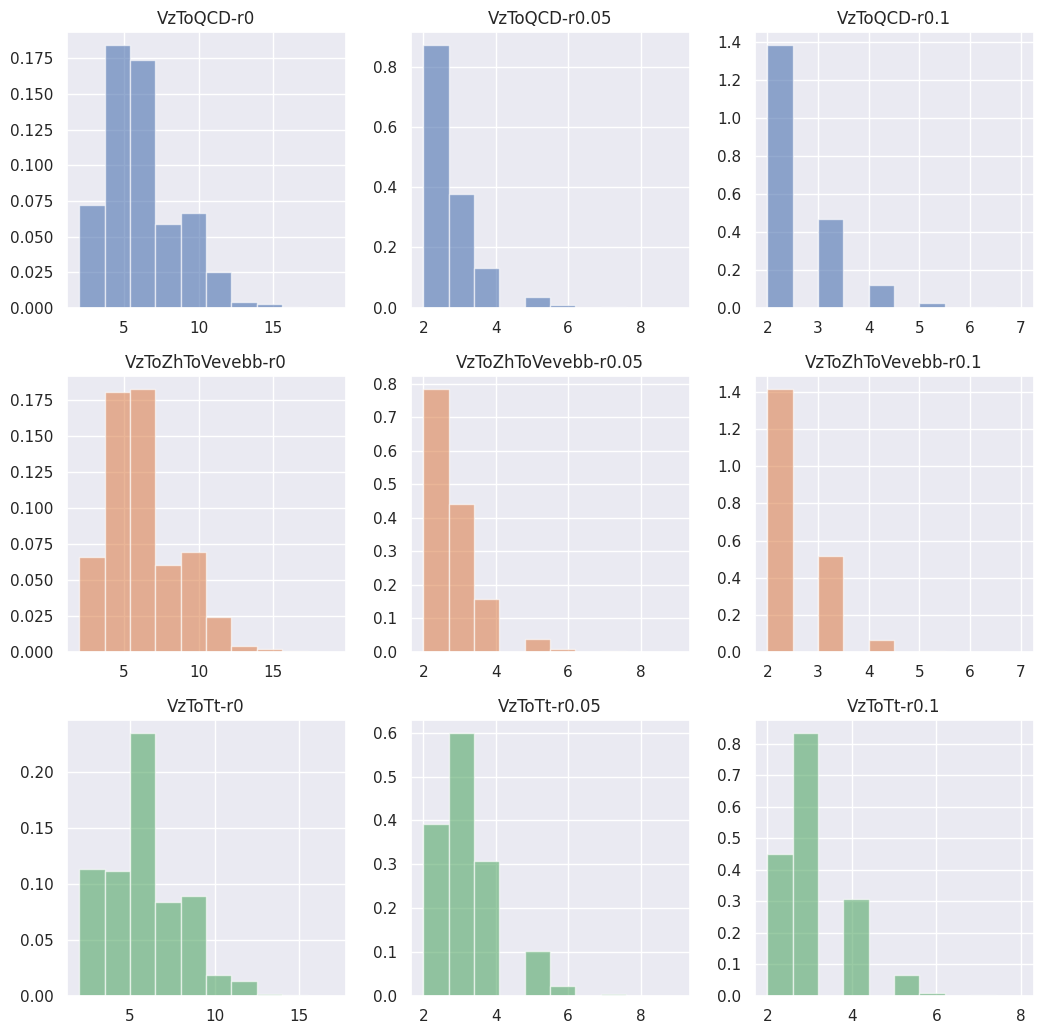

In [3]:
# Figure configurations.
num_row = len(channel_list) # Number of rows.
num_col = len(subjet_radius_list) # Number of columns, "+1" used for total.
width, height = 3.5 * num_col, 3.5 * num_row # Figure width and height.

# Create figures.
fig, ax = plt.subplots(num_row, num_col, figsize=(width, height))

# Draw histograms.
for i, channel in enumerate(channel_list):
    for j, subjet_radius in enumerate(subjet_radius_list):
        # Count number of particles (subjets) for each jet.
        events = fatjet_events_dict[channel][j].events
        num_ptcs = ak.num(events["fast_pt"])

        # Setup histogram.
        color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i]
        ax[i][j].hist(
            x=ak.to_numpy(num_ptcs),
            bins=10,
            density=True,
            alpha=0.6,
            color=color,
        )
        ax[i][j].set_title(f"{channel}-r{subjet_radius}")

        # See maximum number of particles.
        print(
            f"Channel {channel} | R {subjet_radius:.2f} -> has "
            f"min/max num_ptcs = ({ak.min(num_ptcs)}, {ak.max(num_ptcs)})"
        )
        
plt.tight_layout()

### Print the distribution of $p_T$ of each reclustered jets

In [4]:
num_ptcs_threshold = 16
np.set_printoptions(
    threshold=num_ptcs_threshold,
    precision=2,
    suppress=True
)

for channel in channel_list:
    for j, subjet_radius in enumerate(subjet_radius_list):
        # Count number of particles (subjets) for each jet.
        events = fatjet_events_dict[channel][j].events
        
        # Print out pt for each jet.
        print(f"Channel = {channel} | R = {subjet_radius}")
        
        for i in range(10):
            # Get particles and sort it.
            array = ak.to_numpy(events['fast_pt'][i])
            array = np.sort(array)[::-1]
            array = array[:num_ptcs_threshold]

            # Turn array to string.
            array_str = np.array2string(array).replace('\n', '')
            array_str = ", ".join(array_str.split())
            print(f" - {array_str}")
        
        print()
        print(100 * "-")
        print()

Channel = VzToQCD | R = 0
 - [234.94, 100.4, 89.72, 83.73, 73.49, 46.59]
 - [174.22, 127.35, 124.94, 120.11, 116.87]
 - [317.64, 107.24, 74.66, 61.77, 58.62, 55.85, 53.9, ]
 - [391.72, 150.25, 99.21, 90.05, 52.25]
 - [281.04, 144.87, 70.31, 48.85, 45., 45., ]
 - [325.49, 185.09, 128.83, 128.83, 83.49, 75.21, 75.21]
 - [148.04, 103.89, 100.65, 88.49, 70.17, 66.51, 58.18, 58.18]
 - [336.5, 180.23, 73.82, 61.1, 61.1, 53.58, 53.58]
 - [196.74, 110.95, 91.75, 67.86, 59.92]
 - [221.92, 134.39, 66.8, 65.58, 65.58, 57.08, 55.02]

----------------------------------------------------------------------------------------------------

Channel = VzToQCD | R = 0.05
 - [616.77, 150.22]
 - [1101.4, 216.28]
 - [803.7, 68.93]
 - [432.78, 337.28, 298.25]
 - [870.45, 95.52]
 - [527.92, 262.67]
 - [570.02, 514.12]
 - [796.61, 352.41, 239.71]
 - [547.67, 178.98]
 - [471.46, 207.16, 111.6, ]

----------------------------------------------------------------------------------------------------

Channel = VzToQC